In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Импортируем Fashion MNIST датасет

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
#Датасет содержит следующие классы:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#размер тренировочного датасета
train_images.shape

(60000, 28, 28)

In [11]:
train_labels.shape

(60000,)

In [12]:
#размер тестового датасета
test_images.shape

(10000, 28, 28)

In [13]:
test_labels.shape

(10000,)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

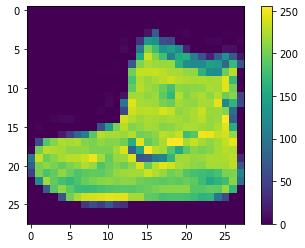

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

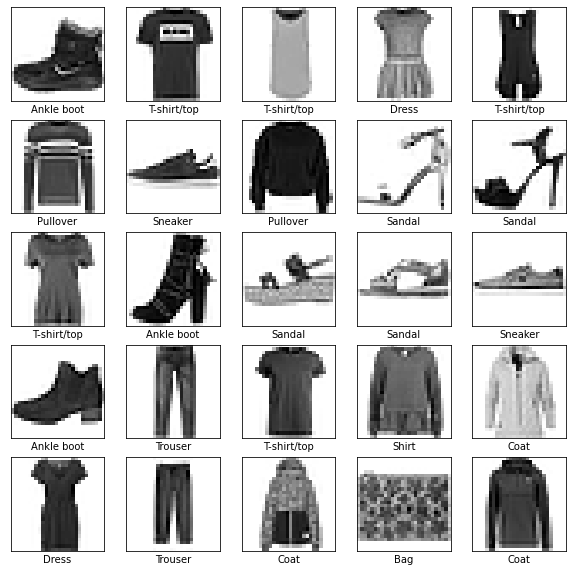

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [19]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8242
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8623
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8777


In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3965 - accuracy: 0.8608


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых даыннх и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

In [26]:
predictions[0]

array([3.97784534e-05, 2.71573640e-06, 8.55973030e-06, 1.78219409e-06,
       1.05408195e-04, 1.75479483e-02, 2.71581539e-05, 1.10531285e-01,
       1.31151348e-04, 8.71604204e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

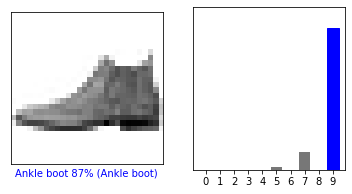

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

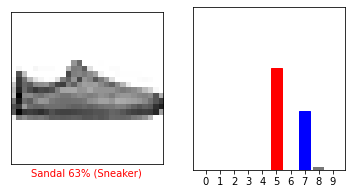

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

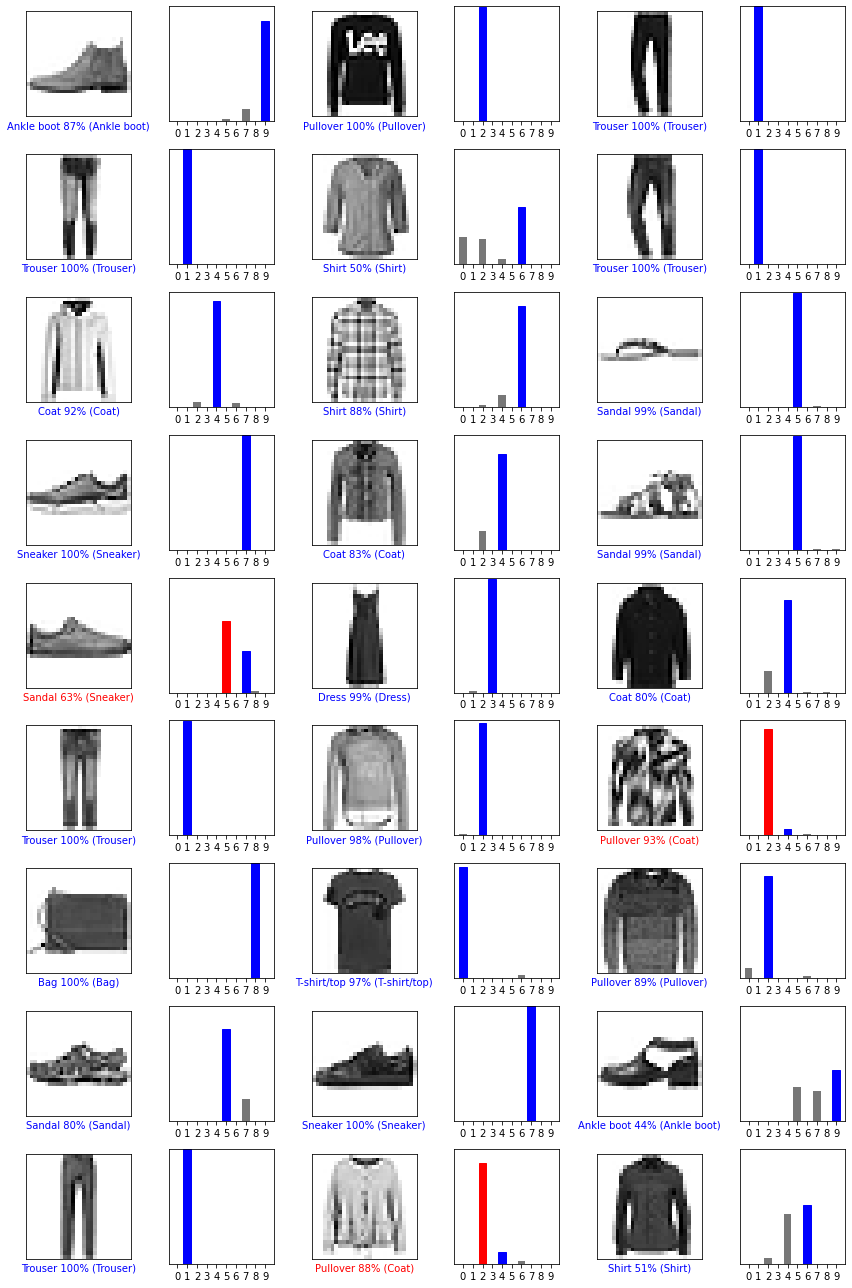

In [33]:
num_rows = 9
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Практическое задание

1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [70]:
def create_model(train_images, train_labels, test_images, test_labels, neurons, internal_layers, epochs, verb_param, 
                 metric='accuracy', loss_func='categorical_crossentropy'):
    #Устанавливаем слои
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(neurons, activation='relu'))
    for i in range(internal_layers):
        model.add(keras.layers.Dense(neurons, activation='relu'))
    model.add(keras.layers.Dense(10))
        
    # Compile the model.
    model.compile(
      optimizer='adam',
      loss=loss_func,
      metrics=[metric],
    )
    
    # Train the model.
    model.fit(train_images, train_labels, epochs=epochs, verbose=verb_param)

    # Evaluate the model.
    model.evaluate(test_images, test_labels, verbose=2)
    
    return model

In [44]:
%%time
for e in [3, 5, 7, 10]:
    for l in [0, 1, 3, 5]:
        for n in [128, 256, 320, 384]:
            print(f'Эпох: {e}, cлоев: {l}, нейронов: {n}')
            create_model(train_images, train_labels, test_images, test_labels, neurons=n, internal_layers=l, epochs=e, verb_param=0, 
                         metric='accuracy', loss_func=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

Эпох: 3, cлоев: 0, нейронов: 128
313/313 - 1s - loss: 0.3646 - accuracy: 0.8697
Эпох: 3, cлоев: 0, нейронов: 256
313/313 - 1s - loss: 0.3690 - accuracy: 0.8663
Эпох: 3, cлоев: 0, нейронов: 320
313/313 - 1s - loss: 0.3734 - accuracy: 0.8669
Эпох: 3, cлоев: 0, нейронов: 384
313/313 - 1s - loss: 0.3715 - accuracy: 0.8617
Эпох: 3, cлоев: 1, нейронов: 128
313/313 - 1s - loss: 0.3710 - accuracy: 0.8692
Эпох: 3, cлоев: 1, нейронов: 256
313/313 - 1s - loss: 0.3981 - accuracy: 0.8612
Эпох: 3, cлоев: 1, нейронов: 320
313/313 - 1s - loss: 0.3612 - accuracy: 0.8707
Эпох: 3, cлоев: 1, нейронов: 384
313/313 - 1s - loss: 0.3897 - accuracy: 0.8610
Эпох: 3, cлоев: 3, нейронов: 128
313/313 - 1s - loss: 0.3601 - accuracy: 0.8701
Эпох: 3, cлоев: 3, нейронов: 256
313/313 - 1s - loss: 0.3965 - accuracy: 0.8542
Эпох: 3, cлоев: 3, нейронов: 320
313/313 - 1s - loss: 0.3921 - accuracy: 0.8578
Эпох: 3, cлоев: 3, нейронов: 384
313/313 - 1s - loss: 0.4187 - accuracy: 0.8638
Эпох: 3, cлоев: 5, нейронов: 128
313/313

#### Наилучший результат accuracy 0.8894, loss 0.327 при параметрах:
- 10 эпох
- 1 дополнительных слоев (т.е. внутри всего 1 слой)
- 256 нейрона.

Увеличение эпох приводит к тому, что кол-во слоев можно делать меньше для достижения наилучшего результата. А увеличение слоев приводит к потребности к меньшему кол-ву нейронов в слое. Хотелось бы узнать о причинах таких взаимосвязей.

Протестируем итоговую модель несколько раз, чтобы уточнить accuracy:

In [48]:
models = []
for i in range(5): 
    models.append(create_model(train_images, train_labels, test_images, test_labels, neurons=256, internal_layers=1, epochs=10, verb_param=0, 
                 metric='accuracy', loss_func=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)))

313/313 - 0s - loss: 0.3413 - accuracy: 0.8840
313/313 - 0s - loss: 0.3250 - accuracy: 0.8888
313/313 - 0s - loss: 0.3365 - accuracy: 0.8819
313/313 - 0s - loss: 0.3335 - accuracy: 0.8872
313/313 - 0s - loss: 0.3205 - accuracy: 0.8905


2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.

In [49]:
#сохраним лучшую модель
models[4].save('best_model.tf', overwrite=True, include_optimizer=True, save_format='tf',
    signatures=None, options=None)

In [50]:
#загрузим модель:
best_model = keras.models.load_model(
    'best_model.tf', custom_objects=None, compile=True
)

In [52]:
predictions = best_model.predict(test_images)
np.argmax(predictions[0]), test_labels[0]

(9, 9)

3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [119]:
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D

In [107]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Посмотрим на содержимое

In [108]:
#Размеры тренировочных датасетов
train_data.shape, train_labels.shape

((25000,), (25000,))

In [55]:
#Размеры тестовых датасетов
test_data.shape, test_labels.shape

((25000,), (25000,))

In [56]:
#Сколько классов?
set(train_labels)

{0, 1}

In [60]:
#уникальных значений в тренировочном датасете
len(np.unique(train_data))

24902

In [111]:
train_length = [len(i) for i in train_data]
test_length = [len(i) for i in test_data]
print("Средний размер отзыва в тренировочных данных:", np.mean(train_length))
print("Стандартное отклонение в тренировочных данных:", round(np.std(train_length)))
print('Максимальный размер отзыва в тренировочных данных:', np.max(train_length))
print('Минимальный размер отзыва в тренировочных данных:', np.min(train_length))
print("Средний размер отзыва в тестовых данных:", np.mean(test_length))
print("Стандартное отклонение в тестовых данных:", round(np.std(test_length)))
print('Максимальный размер отзыва в тестовых данных:', np.max(test_length))
print('Минимальный размер отзыва в тестовых данных:', np.min(test_length))

Средний размер отзыва в тренировочных данных: 238.71364
Стандартное отклонение в тренировочных данных: 176.0
Максимальный размер отзыва в тренировочных данных: 2494
Минимальный размер отзыва в тренировочных данных: 11
Средний размер отзыва в тестовых данных: 230.8042
Стандартное отклонение в тестовых данных: 169.0
Максимальный размер отзыва в тестовых данных: 2315
Минимальный размер отзыва в тестовых данных: 7


In [69]:
#Посмотрим на содержимое одного из наблюдений:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [72]:
#переведем в слова:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[0]] )
print(decoded) 

1646592/1641221 [==============================] - 1s 1us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile 

Т.к. у нас разные размеры отзывов, нужно их все привести к общему размеру. Заполним нулями спискии отзывов до значения 2500:

In [109]:
max_sequence_length = 2500
padded_inputs = pad_sequences(train_data, maxlen=max_sequence_length, value = 0.0)
padded_inputs_test = pad_sequences(test_data, maxlen=max_sequence_length, value = 0.0)

In [110]:
padded_inputs.shape

(25000, 2500)

In [113]:
len(padded_inputs[0])

2500

In [112]:
for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))

Sample = 5326 | Length = 2500
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

Sample = 24073 | Length = 2500
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [123]:
#Параметры модели
num_distinct_words = 10000
embedding_output_dims = 15
loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
number_of_epochs = 10
verbosity_mode = True
validation_split = 0.20

In [124]:
#Определим слои модели
model = keras.Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

In [126]:
%%time
#Компилируем модель
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

#Выводим данные по модели
model.summary()

#Тренируем модель
history = model.fit(padded_inputs, train_labels, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2500, 15)          150000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 2500, 15)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2500, 32)          992       
_________________________________________________________________
dropout_4 (Dropout)          (None, 2500, 32)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1250, 32)          0         
_________________________________________________________________
flatten_120 (Flatten)        (None, 40000)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 40000)          

In [127]:
# Test the model after training
test_results = model.evaluate(padded_inputs_test, test_labels, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.38953012228012085 - Accuracy: 86.40000224113464%


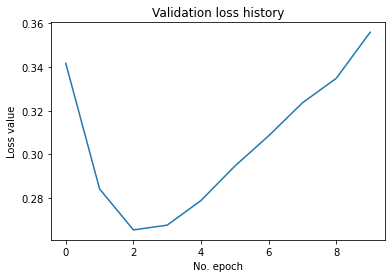

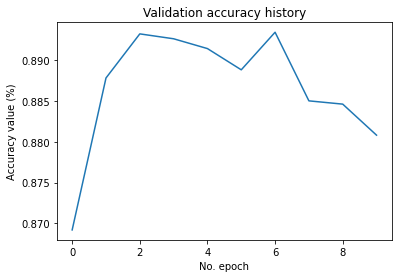

In [128]:
# Visualize history
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

По графикам видно, что на качество модели существенное влияение оказало кол-во эпох - в данном случае наилучший результат был достигнут уже на 2-х эпохах, и дальше можно было не идти